In [4]:
import pyvista as pv
import rioxarray as riox
import numpy as np

In [5]:
# Reading in the data
data = riox.open_rasterio("data/input/dem.tif")

data = data[0]

# Saving the raster data as array
values = np.asarray(data)

# Creating meshgrid
x, y = np.meshgrid(data['x'], data['y'])

# Setting zz values
z = np.zeros_like(x)

# Creating Structured Grid
mesh = pv.StructuredGrid(x, y, z)

# Assign Elevation Values
mesh["Elevation"] = values.ravel(order='F')

topo = mesh.warp_by_scalar(scalars="Elevation", factor=0.000015)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


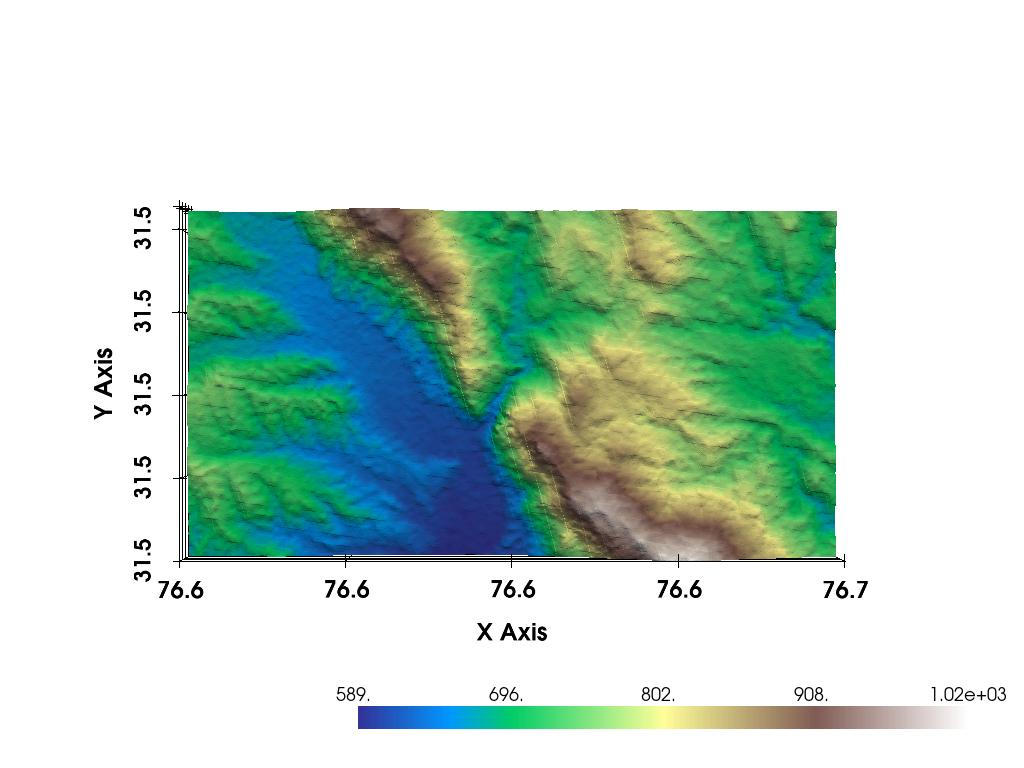

: 

In [6]:
p = pv.Plotter()

p.add_mesh(mesh=topo, scalars=topo["Elevation"], cmap='terrain')

p.show_grid(color='black')
p.set_background(color='white')
p.show(cpos="xy")